In [148]:
%reset -f
import pandas as pd
import numpy as np

original_prices = pd.read_csv("HistoricalPrices.csv", sep=r'\s*,\s*', engine = 'python')[::-1].reset_index(drop=True)

prices = original_prices.copy(deep = True)

#prices['Difference'] = prices['Close'].diff(1).fillna(0)

prices['Date'] = prices['Date'].apply(lambda x: int(''.join(x[0:5].split('/'))))


print(prices)

      Date    Open    High     Low   Close
0      301  1.1923  1.1923  1.1923  1.1923
1      302  1.1923  1.2040  1.1923  1.2040
2      303  1.2040  1.2043  1.2040  1.2043
3      306  1.2043  1.2043  1.2017  1.2017
4      307  1.2017  1.2017  1.1888  1.1888
...    ...     ...     ...     ...     ...
3438   506  1.1176  1.1211  1.1170  1.1200
3439   507  1.1199  1.1219  1.1166  1.1192
3440   508  1.1193  1.1215  1.1182  1.1193
3441   509  1.1194  1.1252  1.1175  1.1216
3442   510  1.1214  1.1254  1.1214  1.1235

[3443 rows x 5 columns]


In [149]:
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

# Standardize the columns
prices_standardized=(prices-prices.min())/(prices.max()-prices.min())

prices_standardized

,Date,Open,High,Low,Close
0,0.176991,0.273782,0.270004,0.283971,0.273911
1,0.177876,0.273782,0.290994,0.283971,0.294789
2,0.178761,0.294664,0.291532,0.304972,0.295325
3,0.181416,0.295199,0.291532,0.300844,0.290685
4,0.182301,0.290559,0.286868,0.277688,0.267666
...,...,...,...,...,...
3438,0.358407,0.140460,0.142268,0.148806,0.144897
3439,0.359292,0.144565,0.143703,0.148088,0.143469
3440,0.360177,0.143495,0.142985,0.150960,0.143647
3441,0.361062,0.143673,0.149623,0.149704,0.147752


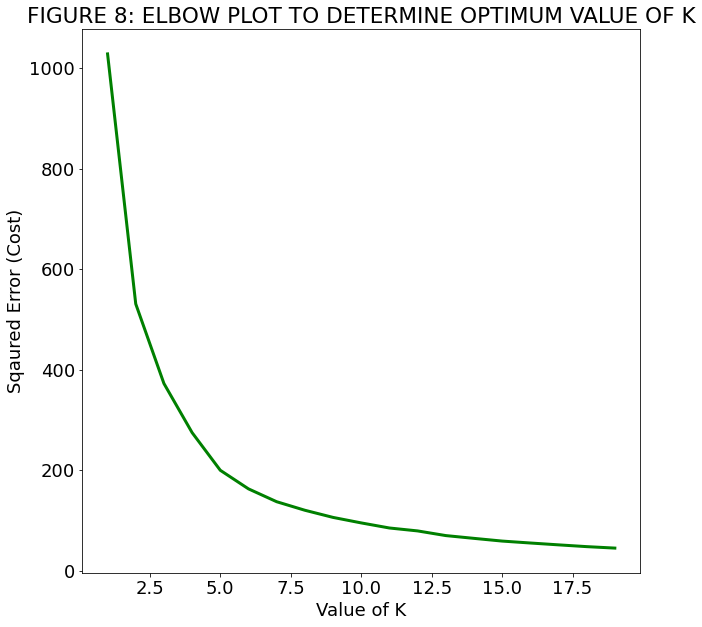

In [150]:
import matplotlib.pyplot as plt
# Finding the value of K

cost =[] 
for i in range(1, 20): 
    KM = KMeans(n_clusters = i, max_iter = 500) 
    KM.fit(prices_standardized) # USE STANDARDIZED DATA HERE
      
    # calculates squared error for the clustered points 
    cost.append(KM.inertia_)
    
    
# plot the cost against K values   
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams.update({'font.size': 18})
plt.plot(range(1, 20), cost, color ='g', linewidth ='3') 
plt.xlabel("Value of K") 
plt.ylabel("Sqaured Error (Cost)") 
plt.title("FIGURE 8: ELBOW PLOT TO DETERMINE OPTIMUM VALUE OF K")
plt.show()

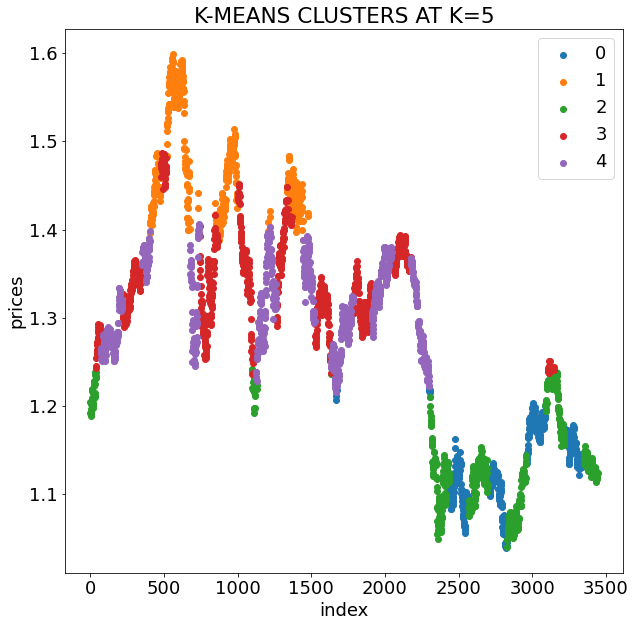

In [151]:
#####################################################################################
# BEGIN K-MEANS
#####################################################################################
num_clusters = 5
kmeans = KMeans(n_clusters= num_clusters)
label = kmeans.fit_predict(prices_standardized) 
u_labels = np.unique(label)

idx = np.array(list(prices.index))
close_price = np.array(list(prices['Close']))

fig = plt.figure()
for i in u_labels:
    plt.scatter(idx[label == i] , close_price[label == i] , label = i) 
plt.legend()
plt.xlabel("index")
plt.ylabel("prices")
plt.title("K-MEANS CLUSTERS AT K={}".format(num_clusters))
plt.show()


In [152]:
print(original_prices[label==label[len(prices)-1]])

ValueError: Item wrong length 3443 instead of 3943.